# Airbnb data analysis 
### by Aravind Gowthaman

<ul>
<li> <a href="#intro">Introduction and Objective</a></li>
<li> <a href="#questions">Questions of Interest</a></li>   
<li> <a href="#gather"> Data Gathering </a> </li>
<li> <a href="#wrangle"> Data Wrangling </a> </li>
<li> <a href="#EDA"> Exploratory data analysis </a> </li> 
<li> <a href="#predict"> Modelling and Prediction </a> </li> 
<li> <a href="#Inference"> Inference </a> </li> 
    
</ul>    

<a id="Intro"></a>

## Introduction and Objective

<b> <p> 
    The objetive of this analysis is to gain some insights of how Airbnb stays have fared with respect to regions, preference etc., and to give users to some knowledge on to what to look out for when they book an Airbnb apartment next time around. <br>
    This analysis is pertained to addressing few questions of interest of Airbnb stays in Seattle and Boston which are segregated into three categories. 
    <ul>
        <li> For Airbnb Customers </li>
        <li> For Airbnb as a company </li> 
        <li> Comparison between the stays of Seattle and Boston. </li>
    </ul>
    The data is being acquired from Kaggle from the following links:<br>
    https://www.kaggle.com/airbnb/seattle/data<br>
    https://www.kaggle.com/airbnb/boston </p></b>
    
I have considered Seattle dataset for the major part of the analysis and Boston dataset for comparison purpose alone.

## Questions of Interest
<a id="questions"></a>

<b> Question as a Airbnb Customers </b> 
<ol>
 <li> How is the price varied for the properties  </li>
 <li> what is the best time to book? </li>
 <li> What are the common amenities for the properties in Seattle? </li>
 <li> Relationship between Review and price?</li>
</ol>



<b> Questions on comparison between Seattle and Boston </b> 
<ol>
 <li> What is the price comparison? </li>
 <li> Amenities comparison?  </li> 
 <li> Accommodatescomparison? </li>  
 <li> Bedrooms comparison?</li>    
</ol>

<b> Questions on General perspective </b> 
<ol>
    <li> Which features will provide significant importance in booking an Airbnb stay in the future  </li>
</ol>

In [5]:
#importing the libraries here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


<a id="gather"></a>

## Gathering data

In [34]:
# importing the Seattle dataset
df_seattle_calendar= pd.read_csv('calendar_seattle.csv')
df_seattle_listing=pd.read_csv('listings_seattle.csv')
df_seattle_reviews=pd.read_csv('reviews_seattle.CSV')

In [35]:
# importing the Boston dataset
df_boston_calendar= pd.read_csv('calendar_boston.csv')
df_boston_listing=pd.read_csv('listings_boston.csv')
df_boston_reviews=pd.read_csv('reviews_boston.CSV')

## Data Wrangling
<a id="wrangle"></a>

<b> On Seattle_calendar dataset </b>

### <b> Custom function-1-- cleansing calendar dataset  </b>

In [36]:
def calendar_dataset(data):
    '''Function to change the data type of date column and strip the price column of '$' and white space. '''
    #converting the data type of date column from object to date format
    data['date']=pd.to_datetime(data['date'])
    # converting the price column into float
    data['price']=data['price'].str.strip('$').str.replace(",","").astype(float)
    print(calendar_dataset.__doc__)
    return data

In [37]:
#Appyling the cleanse function into calendar dataset 
df_seattle_calendar=calendar_dataset(df_seattle_calendar)

Function to change the data type of date column and strip the price column of '$' and white space. 


In [16]:
#Having a look at the info
df_seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1048575 non-null  int64         
 1   date        1048575 non-null  datetime64[ns]
 2   available   1048575 non-null  object        
 3   price       699862 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.0+ MB


<b> On the Seattle listing dataset </b>

### <b> Custom function 2 -- Cleansing Listing dataset </b>

In [38]:
def listing_dataset(data):
    ''' Function to  price column into float, strip the price column of '$' and white space from price columns 
    and dropping the Nan from review columns.'''
    # converting the price column into float
    data['price']=data['price'].str.strip('$').str.replace(",","").astype(float)
    data['cleaning_fee']=data['cleaning_fee'].str.strip('$').str.replace(",","").astype(float)
    data['security_deposit']=data['security_deposit'].str.strip('$').str.replace(",","").astype(float)
    data['extra_people']=data['extra_people'].str.strip('$').str.replace(",","").astype(float)
    data['host_response_rate']=data['host_response_rate'].str.strip('%').str.replace(",","").astype(float)
    data['cancellation_policy']=  pd.Categorical(data['cancellation_policy'])  
    data['host_is_superhost']=  pd.Categorical(data['host_is_superhost']) 
    #dropping the Nan from review columns
    data=data.dropna(subset=['review_scores_value','review_scores_location',
                                                     'review_scores_checkin','review_scores_rating','review_scores_accuracy',
                                                     'review_scores_cleanliness','review_scores_communication',
                                                     'cancellation_policy','host_response_rate',
                                                     'host_is_superhost','cleaning_fee','security_deposit','extra_people',
                                                     'minimum_nights'],how='any')
    print(listing_dataset.__doc__)
    return data

In [39]:
#assigning df_seattle_listing to the above function
df_seattle_li=listing_dataset(df_seattle_listing)

 Function to  price column into float, strip the price column of '$' and white space from price columns 
    and dropping the Nan from review columns.


In [9]:
#checking on the dimension of the dataframe
df_seattle_li.shape

(1326, 92)

### <b> 1.  How is the price varied for the properties  </b><br> 
I have considered neighbourhood, room type and accomodates columns to analyse the price distribution 

In [10]:
# getting an insight of the data
df_seattle_li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 1 to 3814
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                1326 non-null   int64   
 1   listing_url                       1326 non-null   object  
 2   scrape_id                         1326 non-null   int64   
 3   last_scraped                      1326 non-null   object  
 4   name                              1326 non-null   object  
 5   summary                           1256 non-null   object  
 6   space                             1246 non-null   object  
 7   description                       1326 non-null   object  
 8   experiences_offered               1326 non-null   object  
 9   neighborhood_overview             1057 non-null   object  
 10  notes                             878 non-null    object  
 11  transit                           1083 non-null   object

### custom function-3-- bar plots

In [40]:
def custom_plots(x,y,xlabel,ylabel,title,ax=None,**kwargs):
    '''Creating functions for grouping for bar plots.'''
    if ax is None:
        plt.gca()
    ax=sns.barplot(x,y,palette='rocket')
    plt.xticks(rotation=30,fontsize=15)
    ax.set(xlabel=xlabel,ylabel=ylabel,title=title);
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.title(title,fontsize=17)
    print(custom_plots.__doc__)
    return ax

### custom function-4-- grouping function

In [42]:
def custom_grouping_mean(data,var1,var2,**kwargs):
    '''Creating function for grouping variables based on mean'''
    df_gr=data.groupby(var1)[var2].mean().sort_values(ascending=False)
    df_gr=pd.DataFrame(df_gr)
    df_gr.reset_index(inplace=True)
    print(custom_grouping_mean.__doc__)
    return df_gr

In [43]:
#grouping by neighbourhood
df_neighbour=custom_grouping_mean(df_seattle_li,'neighbourhood','price')

Creating function for grouping variables based on mean


In [14]:
df_neighbour.head()

,neighbourhood,price
0,Westlake,347.500000
1,Portage Bay,294.250000
2,Fauntleroy,231.600000
3,Pike Place Market,221.785714
4,South Lake Union,197.555556


Creating functions for grouping for bar plots.
Creating functions for grouping for bar plots.


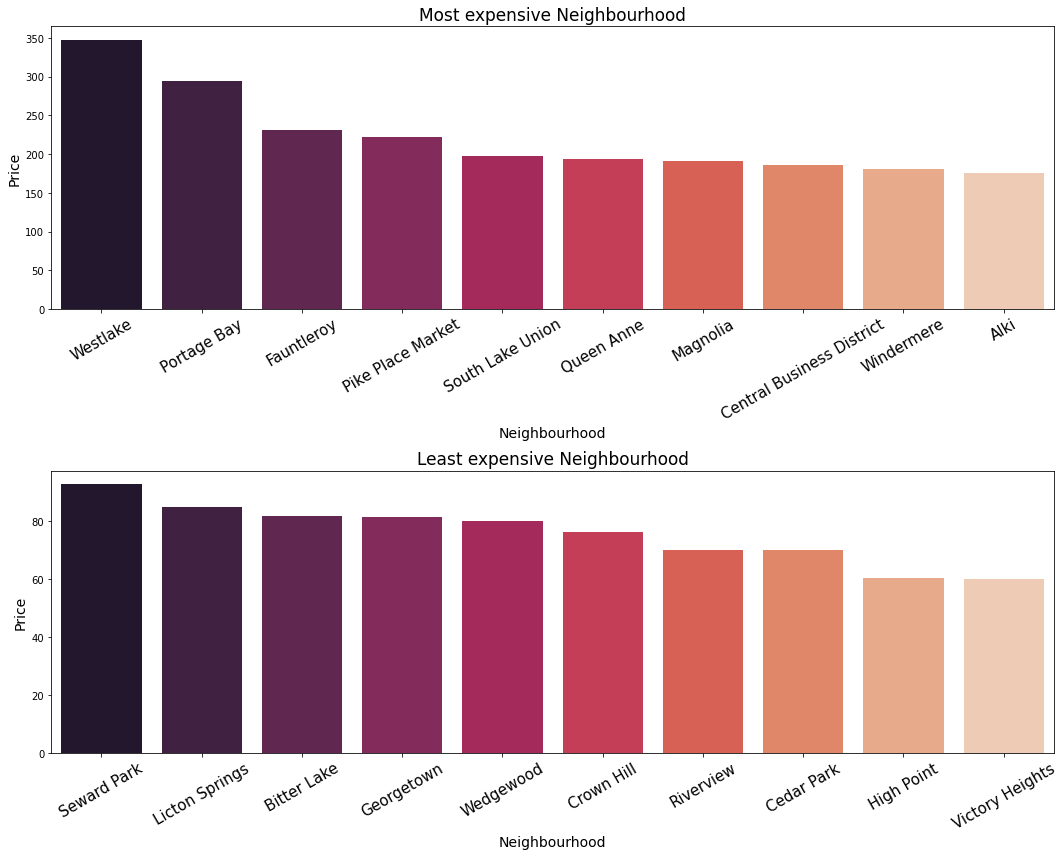

In [44]:
plt.figure(figsize=[15,12])
plt.subplots_adjust(hspace=8, wspace=1)

plt.subplot(2,1,1)
custom_plots(df_neighbour['neighbourhood'].head(10),df_neighbour['price'].head(20),xlabel='Neighbourhood',ylabel='Price',title='Most expensive Neighbourhood')
plt.subplot(2,1,2)
custom_plots(df_neighbour['neighbourhood'].tail(10),df_neighbour['price'].tail(20),xlabel='Neighbourhood',ylabel='Price',title='Least expensive Neighbourhood')
plt.tight_layout()

<b> From the above plots, it can be inferred that the Fairmount park fares way higher in terms of average price for an Airbnb apertment and Roxhill has the lowest. It would be interesting to check on the review perspective of it</b>

In [16]:
#grouping by room type
df_roomtype=custom_grouping_mean(df_seattle_li,'room_type','price')
df_roomtype.head()

,room_type,price
0,Entire home/apt,160.036019
1,Private room,69.126050
2,Shared room,49.575758


In [17]:
#no of stays wrt room types
c=df_seattle_li['room_type'].value_counts()
c/c.sum()*100

Entire home/apt    79.562594
Private room       17.948718
Shared room         2.488688
Name: room_type, dtype: float64

In [18]:
c/c.sum()*100

Entire home/apt    79.562594
Private room       17.948718
Shared room         2.488688
Name: room_type, dtype: float64

<AxesSubplot:title={'center':'Room type vs Price'}, xlabel='Room type', ylabel='Average Price'>

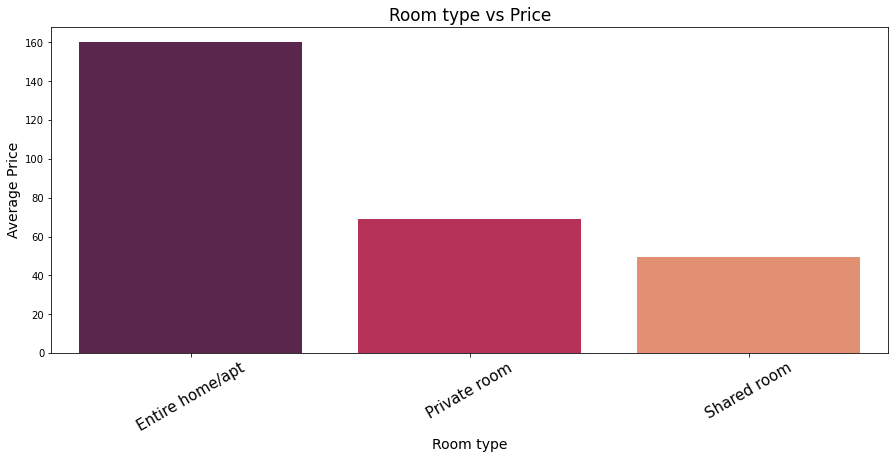

In [19]:
#analysing the price with a pie chart
plt.figure(figsize=[15,6])
custom_plots(df_roomtype['room_type'],df_roomtype['price'],xlabel='Room type',ylabel='Average Price',title='Room type vs Price')

<b> Most of the stays in Seatlle have registered an entire apartment (close to 56%). This is an indication of the preference showed by the customers renting. And shared room have been the least preferred. So Customers who are looking to accomadate more people can have look at stays in Seattle. </b>

In [20]:
# analysing how price affects the number of accomodates
df_acc=custom_grouping_mean(df_seattle_li,'accommodates','price')
df_acc.head()

,accommodates,price
0,11,975.000000
1,16,439.750000
2,12,358.461538
3,9,326.000000
4,10,309.944444


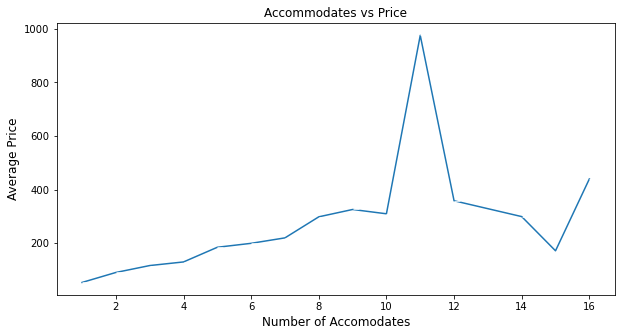

In [21]:
#lineplot for price and accommodates
plt.figure(figsize=[10,5])
sns.lineplot(data=df_acc,x='accommodates',y='price',marker=True)
plt.xlabel('Number of Accomodates',fontsize=12)
plt.ylabel('Average Price',fontsize=12)
plt.title('Accommodates vs Price');

In [22]:
#no of stays wrt Accommodates in Seattle
df_seattle_li['accommodates'].value_counts()

2     430
4     307
3     172
6     149
5      87
8      60
1      52
7      25
10     18
12     13
9       5
16      4
14      2
11      1
15      1
Name: accommodates, dtype: int64

<b> As expected, more the number of accomodates more will be the price. But there aren't many stays which is offering frr more than 12 accommodates in seattle,though most of the type are for the entire Apartments. </b> 

### <b>2.  What is the best time to book? </b>
This section analyses the availabilty of stays across the week and price distribution across months in the year 

In [58]:
#segregating on a weekly basis
df_seattle_calendar['day']=df_seattle_calendar['date'].dt.isocalendar().day
df_seattle_calendar['day_new']=pd.cut(df_seattle_calendar['day'],7,
                                      labels=['Sunday','Monday','Tuesday','Wednesday','Thurday','Friday','Saturday'])

df_seattle_calendar.head()

,listing_id,date,available,price,day,day_new
0,241032,2016-04-01,t,85.0,5,Thurday
1,241032,2016-05-01,t,85.0,7,Saturday
2,241032,2016-06-01,f,NaN,3,Tuesday
3,241032,2016-07-01,f,NaN,5,Thurday
4,241032,2016-08-01,f,NaN,1,Sunday


In [59]:
#grouping by weeks
df_seattle_available=df_seattle_calendar.groupby(['day_new','available'])['available'].count()
df_seattle_available=pd.DataFrame(df_seattle_available)
df_seattle_available.rename(columns={'available':'Counts'},inplace=True)
df_seattle_available.reset_index(inplace=True)
df_seattle_available.head()


,day_new,available,Counts
0,Sunday,f,48105
1,Sunday,t,98407
2,Monday,f,47853
3,Monday,t,98659
4,Tuesday,f,50474


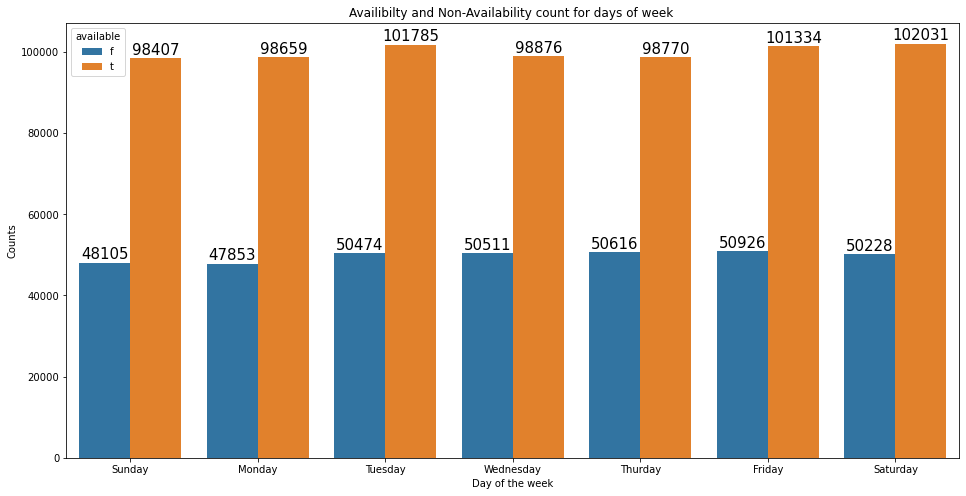

In [60]:
#plotting availibilty for weeks
x=np.arange(len(df_seattle_available))
width=0.35
plt.figure(figsize=[16,8])
plots=sns.barplot(data=df_seattle_available,x='day_new',y='Counts',hue='available');
for bar  in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Day of the week')
plt.ylabel('Counts')
plt.title('Availibilty and Non-Availability count for days of week ')
plt.show()    
    


<b> Though the availibility has been the same for all the days, Tuesdays to Thurdays has seen a marginal rise in the available counts, so this could be a good time to book in a week. </b>

#### <b> Now on the price distribution for months </b>

In [23]:
#Taking out the months of each datetime and converting it into numericals
df_seattle_calendar['month']=df_seattle_calendar['date'].dt.month
df_seattle_calendar['month_new']=pd.cut(df_seattle_calendar['month'],12,
                                      labels=['January','February','March','April','May','June','July','August','September',
                                              'October','November','December'])
df_seattle_calendar

,listing_id,date,available,price,month,month_new
0,241032,2016-04-01,t,85.0,4,April
1,241032,2016-05-01,t,85.0,5,May
2,241032,2016-06-01,f,NaN,6,June
3,241032,2016-07-01,f,NaN,7,July
4,241032,2016-08-01,f,NaN,8,August
...,...,...,...,...,...,...
1048570,5386937,2016-10-20,t,120.0,10,October
1048571,5386937,2016-10-21,t,120.0,10,October
1048572,5386937,2016-10-22,t,120.0,10,October
1048573,5386937,2016-10-23,t,120.0,10,October


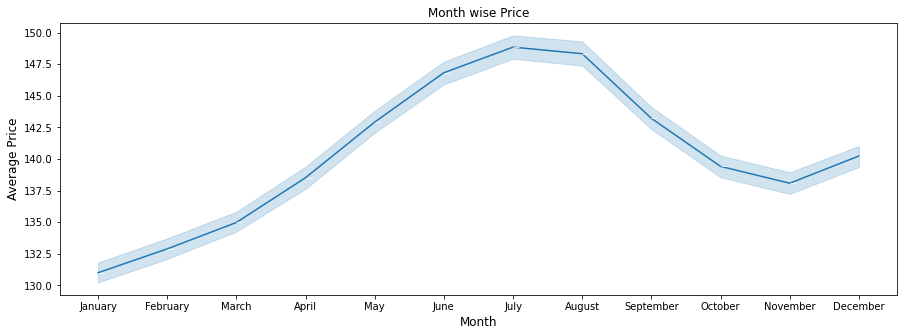

In [24]:
#lineplot for month wise price 
plt.figure(figsize=[15,5])
sns.lineplot(data=df_seattle_calendar[df_seattle_calendar['available']=='t'],x='month_new',y='price',marker=True)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Average Price',fontsize=12)
plt.title('Month wise Price');

<b> Quite expected, the price along the year has been high during the holiday seasons between June and August where summer is at peak. While December has also shown a slight increase in price owing Christmas season. Hence if the customers are looking to book during holidays seasons, then they must be prepared for settling with a higher price than what they would get during off season months like January. <b>

### <b> 3. What are the common amenities present in the Airbnb stays in Seattle? </b>

### <b> Custom function 5 -- Amenities cleansing </b>

In [54]:
def amenities(data):
    ''' Function to make the Amenities column interpretable.'''
    data['amenities_new']=data["amenities"]
    data['amenities_new']=data["amenities_new"].str.replace('"',"").str.replace("}","").str.replace("{","")
    am=data['amenities_new']

    #getting the frequently occured amenities
    from collections import Counter
    amenities=Counter(" ".join(data['amenities_new']).split(',')).most_common(50)
    amenities=pd.DataFrame(amenities,columns=['amenities_new','count'])
    amenities=amenities.groupby('amenities_new')['count'].sum().sort_values(ascending=False)
    amenities=amenities.reset_index()
    #to remove the unwanted words 
    word_index=[]
    wordlist=['this','on','live','in','Friendly']
    for i in wordlist:
        ind=list(am[am==i.index])
        word_index.append(ind)
    word_index[:]

    for i in word_index:
        amenities.drop(index= i,inplace=True)
        
    sns.diverging_palette(220, 20, as_cmap=True)
    plt.figure(figsize=[15,7])
    sns.barplot(data=amenities.head(30),x='amenities_new',y='count',palette="mako")
    plt.xticks(rotation=90); 
    return amenities

 Function to make the Amenities column interpretable.


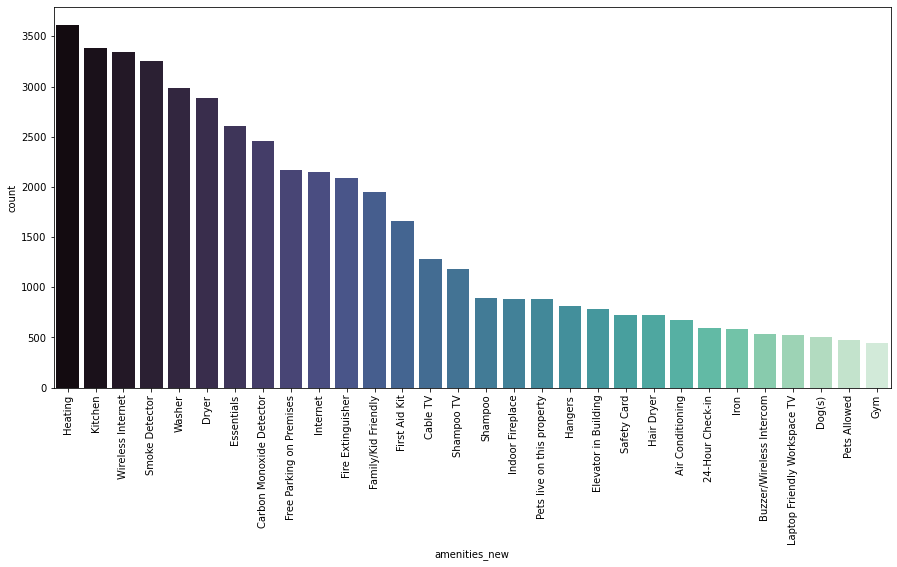

In [56]:
#most common amenities in Seattle
print(amenities.__doc__)
amenities_seattle=amenities(df_seattle_listing)

<b> The common aminities available in Seattle stays are mostly on safety, communication and basic facilites. Carbon monoxide detectors, Smoke Detectors Internet, Parking, Washer etc. </b>

### <b> 4. Relationship between Price and Review </b> <br>
Extending the first question on most and least expensive neighbourhoods, effect of customer acceptance on price is analysed. <br>That is, do expensive neighbourhoods gain more positive reviews than the least expensive neighbourhoods </b> 

In [41]:
# grouping by review and price wrt Neighbourhood
df_seattle_reviews=df_seattle_li.groupby('neighbourhood')['review_scores_rating','price'].mean().sort_values(by='price',ascending=False)
df_seattle_reviews.reset_index(inplace=True)

In [327]:
#checking on the grouped data set
df_seattle_reviews.tail(10)

,neighbourhood,review_scores_rating,price
63,Seward Park,94.187500,92.875000
64,Licton Springs,98.000000,85.000000
65,Bitter Lake,95.200000,81.800000
66,Georgetown,94.000000,81.333333
67,Wedgewood,97.000000,80.000000
68,Crown Hill,94.857143,76.285714
69,Riverview,97.750000,70.000000
70,Cedar Park,100.000000,70.000000
71,High Point,96.500000,60.500000
72,Victory Heights,100.000000,60.000000


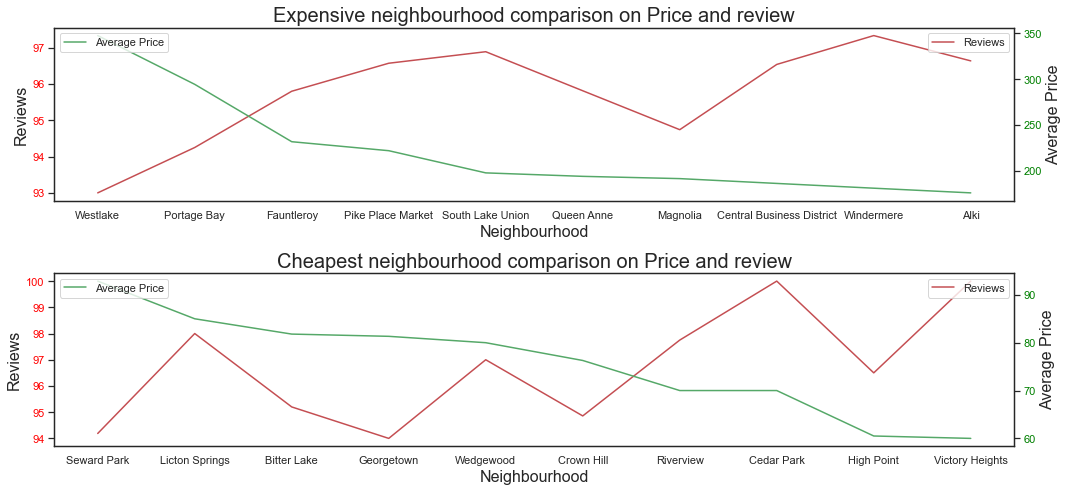

In [47]:
#Multiple Y-axis line plot for plotting review and price vs Neighbourhood
sns.set_style("white")
x1=np.arange(len(df_seattle_reviews['neighbourhood'].head(10)))
labels1=df_seattle_reviews['neighbourhood'].head(10)

fig,(ax1,ax3)=plt.subplots(2,1,figsize=[15,7])
#plotting line charts with dual axis
ax2=ax1.twinx()
ax1.plot(labels1,df_seattle_reviews['review_scores_rating'].head(10),label='Reviews',color='r')
ax2.plot(labels1,df_seattle_reviews['price'].head(10),label='Average Price',color='g')

ax1.set_ylabel('Reviews',fontdict={'size':16})
ax1.set_xlabel('Neighbourhood',fontdict={'size':16})
ax1.set_title('Expensive neighbourhood comparison on Price and review',fontdict={'size':20})
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper right')

ax2.set_ylabel('Average Price',fontdict={'size':16})  
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper left');

x2=np.arange(len(df_seattle_reviews['neighbourhood'].tail(10)))
labels2=df_seattle_reviews['neighbourhood'].tail(10)
ax4=ax3.twinx()
ax3.plot(labels2,df_seattle_reviews['review_scores_rating'].tail(10),label='Reviews',color='r')
ax4.plot(labels2,df_seattle_reviews['price'].tail(10),label='Average Price',color='g')

ax3.set_ylabel('Reviews',fontdict={'size':16})
ax3.set_xlabel('Neighbourhood',fontdict={'size':16})
ax3.set_title('Cheapest neighbourhood comparison on Price and review',fontdict={'size':20})
ax3.set_xticks(x2)
ax3.set_xticklabels(labels2)
ax3.tick_params(axis='y', labelcolor='red')
ax3.legend(loc='upper right')

ax4.set_ylabel('Average Price',fontdict={'size':16})  
ax4.tick_params(axis='y', labelcolor='green')
ax4.legend(loc='upper left')
plt.tight_layout();


<b> As it can be seen that the reviews and price do not go hand in hand.Infact it is in inverse relationship at least for the expensive neighbourhoods. And the Reviews for the cheapest neighbourhood have more or less the same review as the higher paid ones.hence it can be concluded that irrespective of the Neighbourhood, the acceptance has been the same from the customers in terms of services offered by the stays.</b>   

### <b> Boston dataset cleansing </b>

In [48]:
#boston listing dataset 
df_boston_li=listing_dataset(df_boston_listing)

In [49]:
#boston calendar dataset
df_boston_cal=calendar_dataset(df_boston_calendar)

### Comparison between Seattle and Boston Airbnb stays

<b>1.  Price comparison </b> 

In [50]:
#Taking out the months of each datetime and converting it into numericals
df_boston_cal['month']=df_boston_cal['date'].dt.month
df_boston_cal['month_new']=pd.cut(df_boston_cal['month'],12,
                                      labels=['January','February','March','April','May','June','July','August','September',
                                              'October','November','December'])


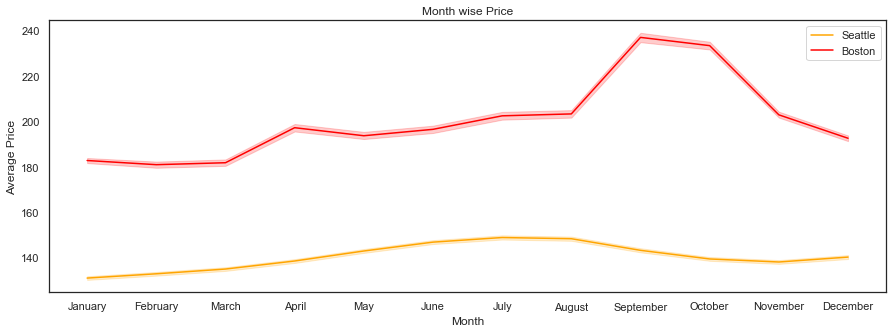

In [51]:
#line plot to plot the price comparison for months
plt.figure(figsize=[15,5])
sns.lineplot(data=df_seattle_calendar[df_seattle_calendar['available']=='t'],x='month_new',y='price',color='orange',label='Seattle')
sns.lineplot(data=df_boston_cal[df_boston_cal['available']=='t'],x='month_new',y='price',color='red',label='Boston')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Average Price',fontsize=12)
plt.title('Month wise Price')
plt.legend();

<b><p> Boston averages much higher than Seattle in prices across the year and Unlike Seattle where the bookings have been expensive during the peak summer (Jul- Aug), Boston stays are expensive during the early fall seasons(Septmber-October) when the temperature neither be too hot nor too cold. This gives an idea of how the preference of people changes according to the location,though weather changes are more or less the same in both the places.<br> In the subsequent analysis, further comparison will be done on features and also I will try to understand the reasons for why the price is on higher end for Boston.  </p></b>  

<b> 2. Amenities comparison </b>

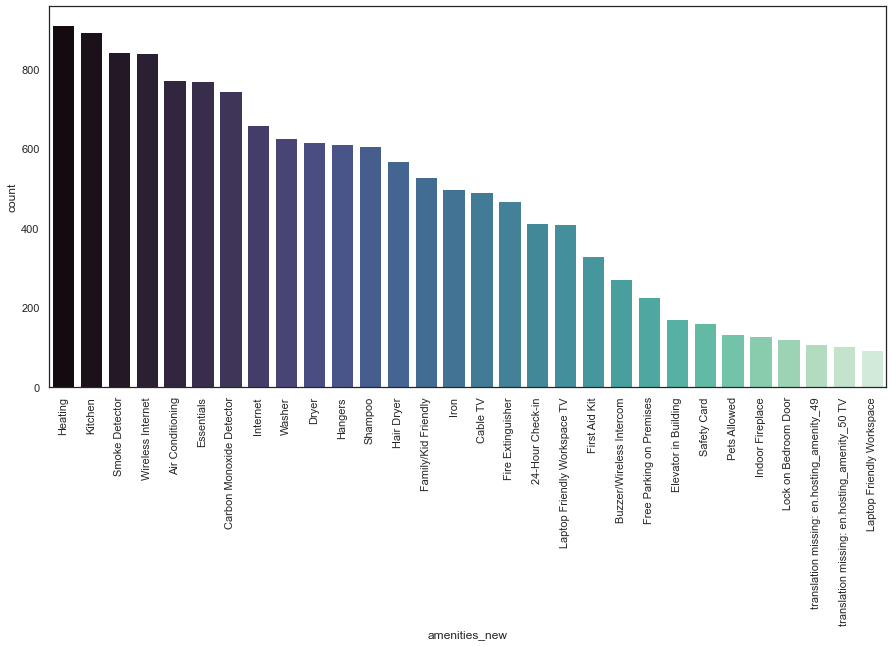

In [52]:
#Top 30 commonly used amenities
amenities_boston=amenities(df_boston_li)

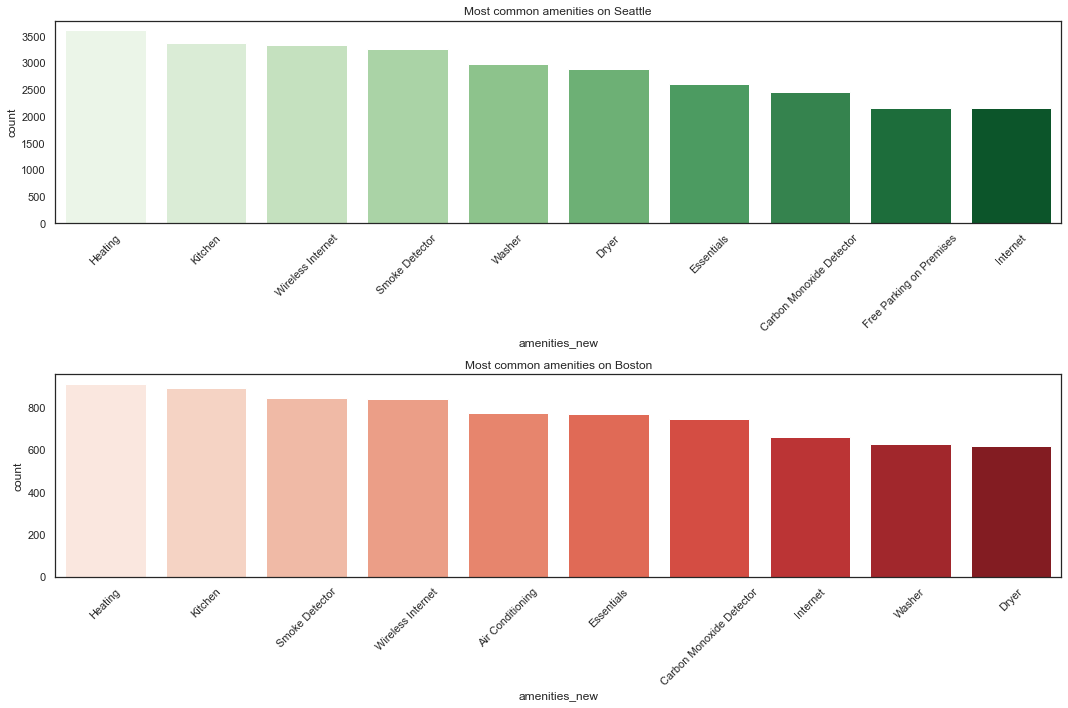

In [54]:
# plotting out the comparison on amenities for Seattle and Boston
fig,axes=plt.subplots(2,1,figsize=[15,10])
fig.subplots_adjust(hspace=1, wspace=1)
ax1=sns.barplot(data=amenities_seattle.head(10),x='amenities_new',y='count',palette='Greens',ax=axes[0])
ax2=sns.barplot(data=amenities_boston.head(10),x='amenities_new',y='count',palette='Reds',ax=axes[1])
axes[0].set_title('Most common amenities on Seattle')
axes[0].set_xticklabels(labels=amenities_seattle['amenities_new'].head(10),rotation=45)
axes[1].set_title('Most common amenities on Boston')
axes[1].set_xticklabels(labels=amenities_boston['amenities_new'].head(10),rotation=45);

#plt.xticks(rotation=80);
fig.tight_layout();

<b> On the amenities, Boston Airbnb stays fares similar to Seattle. Boston basic amenities belongs to health, safety and communication. So there is not a lot of difference in terms of amenities for Boston for it to contribute to higher price </b> 

<b> 3. Accommodate comparison </b>

In [338]:
# analysing how price affects the number of accomodates
df_boston_acc=custom_grouping_mean(df_boston_li,'accommodates','price')
df_boston_li['accommodates'].value_counts()

2     317
4     196
3     120
1      92
6      86
5      48
8      34
7      20
10     10
9       5
12      4
11      3
14      2
16      2
Name: accommodates, dtype: int64

### <b> Custom Function 5-- Line plots </b>

In [20]:
def lineplot(data1,data2,x,y,title,label1,label2):
    '''Function to draw out line plots.'''
    sns.set_style("whitegrid")
    plt.figure(figsize=[15,6])
    sns.lineplot(data=data1,x=x,y=y,color='green',label=label1)
    sns.lineplot(data=data2,x=x,y=y,color='black',label=label2)
    plt.xlabel(str(x),fontsize=14)
    plt.ylabel(str(y),fontsize=14)
    plt.legend()
    plt.title(title,fontsize=14);

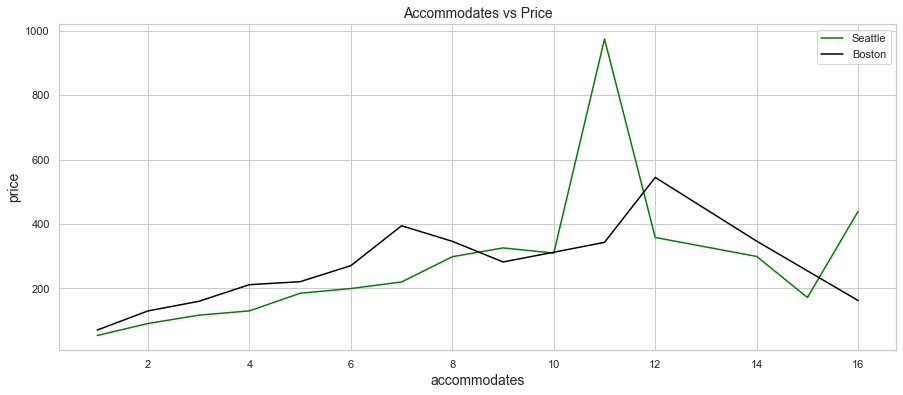

In [340]:
#lineplot for Accommodates
lineplot(df_acc,df_boston_acc,'accommodates','price','Accommodates vs Price','Seattle','Boston')

<b> Interestingly, the Accommodates in Boston are generally higher for 2 to 8 persons except for 10 to 11 persons which gives an idea that as the capacity of person increases the AirBnB in Boston is quite higher than Seattle. </b>

<b> 4. Number of bedroom comparison </b> 

In [341]:
#getting the value counts for each city
df_seattle_li['bedrooms'].value_counts(),df_boston_li['bedrooms'].value_counts()

(1.0    739
 2.0    257
 3.0    141
 0.0    140
 4.0     31
 5.0     11
 6.0      5
 7.0      1
 Name: bedrooms, dtype: int64,
 1.0    556
 2.0    200
 0.0     83
 3.0     66
 4.0     27
 5.0      7
 Name: bedrooms, dtype: int64)

In [342]:
#grouping on bedrooms and price
seattle_bedrooms=custom_grouping_mean(df_seattle_li,'bedrooms','price')
boston_bedrooms=custom_grouping_mean(df_boston_li,'bedrooms','price')


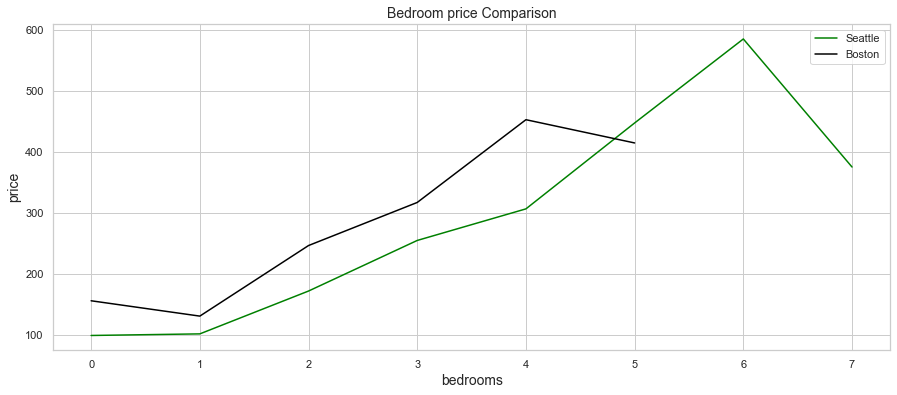

In [343]:
#lineplot for Bedrooms
lineplot(seattle_bedrooms,boston_bedrooms,'bedrooms','price','Bedroom price Comparison','Seattle','Boston')

<b> Boston Airbnb stays do not offer more than 5 bed rooms as in Seatte and the Average price for each of the category is higher in Boston. </b>

<b> 4. Comparison based on review type </b>

In [55]:
#specifying the columns
cols=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                                    'review_scores_communication','review_scores_location','review_scores_value']

In [56]:
#list for appending seattle values
li=[]
for i in cols:
    li.append(df_seattle_li[i].mean())

In [57]:
#list for appending seattle values
li2=[]
for i in cols:
    li2.append(df_boston_li[i].mean())

In [58]:
#dataframe for seattle review
review_seattle=pd.DataFrame(li)
ind1=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                                    'review_scores_communication','review_scores_location','review_scores_value']
review_seattle.index=ind1
review_seattle.columns=['values']
review_seattle['city']='Seattle'

In [59]:
#dataframe for Boston review
review_boston=pd.DataFrame(li2)
review_boston.index=ind1
review_boston.columns=['values']
review_boston['city']='Boston'

In [60]:
#concatenating both the dataframes
reviews=pd.concat([review_seattle,review_boston])

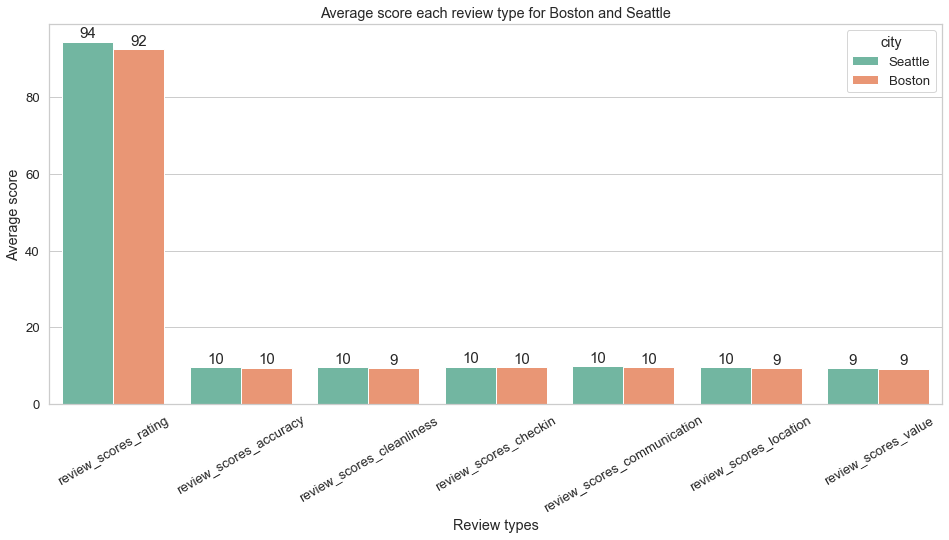

In [61]:
#plotting reviews for boston and Seattle
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
x=np.arange(len(reviews))
width=0.35
plt.figure(figsize=[16,7])
plots=sns.barplot(data=reviews,x=reviews.index,y='values',hue='city',palette="Set2");
for bar  in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Review types')
plt.ylabel('Average score')
plt.title('Average score each review type for Boston and Seattle')
plt.xticks(rotation=30);

<b> Similar to other comparisons, the reviews scores are almost same for Boston and Seattle, reflecting on the quality of services offered in the stays. </b> 

<b> 5. Square feet price comparison </b>

In [351]:
#grouping by square feet and price in Seattle
square_feet_price=custom_grouping_mean(df_seattle_li,'square_feet','price')
ind2=square_feet_price[square_feet_price['square_feet']<=100].index
square_feet_price['unit_price']=square_feet_price['price']/square_feet_price['square_feet']

In [352]:
#dropping indices of ind as the values are insignificant
square_feet_price.drop(index=ind2,inplace=True)

In [353]:
#finding the average unit square feet price
print('The average square feet unit price in Seattle is ',square_feet_price['unit_price'].mean())

The average square feet unit price in Seattle is  0.1757391733024791


In [354]:
#grouping by square feet and price in Boston
square_feet_price_boston=custom_grouping_mean(df_boston_li,'square_feet','price')
ind=square_feet_price_boston[(square_feet_price_boston['square_feet']<=100)].index
square_feet_price_boston['unit_price']=square_feet_price_boston['price']/square_feet_price_boston['square_feet']

In [355]:
#dropping indices of ind as the values are insignificant
square_feet_price_boston.drop(index=ind,inplace=True)

In [356]:
#finding the average unit square feet price

print('The average square feet unit price in Boston is {}'.format(square_feet_price_boston['unit_price'].mean()))

The average square feet unit price in Boston is 0.2299956037944729


<b> As expected, the average price for unit square feet in Boston is more than Seattle. Though the difference is very small when relating it with square feet the cost will be significant. </b>

<b>  Though the Amenities offered and the satisfaction levels are same for Seattle and Boston. Overall, the higher price in Boston accounts to Accommodates, number of bedrooms and unit square feet price. This gives an idea that the cost of living in Boston is higher than that of Seattle. </b>

<a id='predict'></a>
### <b> Modelling and Estimation </b>

<b> In this section, where I have attempted to have a look at the significant parameters which will influence the properties to get booked more in the future. 
In other words, we will have a look at the preferences among customers which will lead them to choose 
An AirBnB stay more.
</b>

<b> Steps </b>
<ol>
    <li> As Amenities is likely to have some significance, it has to be captured seperately and converted into seperate classes.</li>
    <li> Get the listing_id which have been booked acroos the calendar year from the Calendar dataset </li>
    <li> Both the listing dataset and calendar dataset has to be joined to get an concatenated availibility data</li>
    <li> Drop the NaN values after join </li>
    <li> Fit an appropriate model to get the significance </li>
    </ol>
    

<b> Step1 : As Amenities is likely to have some significance, it has to be captured seperately and converted into seperate classes. </b>

In [22]:
#Replacing the unwanted white braces and quotes
amenities = df_seattle_listing['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
df_seattle_listing['amenities'] = amenities

In [23]:
#having a look at the result, no white spaces and quotes should be there
df_seattle_listing['amenities']

0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [Internet, Wireless Internet, Kitchen, Indoor ...
4       [TV, Cable TV, Internet, Wireless Internet, Ki...
                              ...                        
3813    [TV, Cable TV, Internet, Wireless Internet, Ai...
3814    [TV, Cable TV, Internet, Wireless Internet, Ki...
3815    [Cable TV, Wireless Internet, Kitchen, Free Pa...
3816    [TV, Wireless Internet, Kitchen, Free Parking ...
3817    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, Length: 3818, dtype: object

In [24]:
#importing MultilableBinarizer from sklearn and and fitting into amenities column for creating seperate categorical variables
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_result = pd.DataFrame(mlb.fit_transform(df_seattle_listing['amenities']),columns=mlb.classes_, index=df_seattle_listing.index)
amenities_result=pd.get_dummies(amenities_result)
df_seattle_listing = pd.concat([df_seattle_listing, amenities_result], axis=1, sort = False)
#df_amenities_result.drop(['amenities'], axis = 1, inplace = True)


In [25]:
#having a look the classes created
mlb.classes_

array(['', '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype=object)

<b>Step 2: Get the listing_id which have been booked acroos the calendar year from the Calendar dataset </b>

In [26]:
#taking out only the available listings alone as it is needed to take the booking count of the same
df_seattle_cal_avail=df_seattle_calendar[df_seattle_calendar['available']=='t']

In [27]:
#grouping by the count and storing it as DataFrame
df_seattle_avail=pd.DataFrame(df_seattle_cal_avail.groupby('listing_id')['available'].count())
df_seattle_avail.reset_index(inplace=True)
df_seattle_avail.rename(columns={'listing_id':'id'},inplace=True)
df_seattle_avail

,id,available
0,3335,309
1,5682,309
2,6606,365
3,7369,53
4,9460,57
...,...,...
2794,10309898,365
2795,10310373,351
2796,10331249,354
2797,10339145,365


<b> Step 3: Both the listing dataset and calendar dataset has to be joined to get an concatenated availibility data </b>

In [28]:
#merging the dataset 
df_test=df_seattle_listing.merge(df_seattle_avail,on='id',how='inner')

In [29]:
#checking on the merged columns
list(df_test.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


<b>Step 4: Drop the NaN values after join </b>

In [30]:
#Dropping as the modelling techniques does not accept NaN values. 
df_test.dropna(subset=['cancellation_policy','cancellation_policy','host_response_rate','host_is_superhost',
         'cleaning_fee','security_deposit','extra_people','minimum_nights','review_scores_rating'],how='any',inplace=True)

In [31]:
#having a look at the result, should be zero
df_test[['cancellation_policy','cancellation_policy','host_response_rate','host_is_superhost',
         'cleaning_fee','security_deposit','extra_people','minimum_nights','review_scores_rating']].isna().sum()

cancellation_policy     0
cancellation_policy     0
host_response_rate      0
host_is_superhost       0
cleaning_fee            0
security_deposit        0
extra_people            0
minimum_nights          0
review_scores_rating    0
dtype: int64

<b> Step 5:Fit an appropriate model to get the significance </b>

In [72]:
#importing the statsmodel package
import statsmodels.api as sm

In [73]:
#adding intercept to the model, to give a constant bias
df_test['intercept']=1

In [74]:
#creating categorical model for the model
df_test[['cancel_flex','cancel_mode','cancel_strict']]=pd.get_dummies(df_test['cancellation_policy'])
df_test[['superhost_true','superhost_false']]=pd.get_dummies(df_test['host_is_superhost'])

In [75]:
#having a look at the classes created by Multilabler
mlb.classes_

array(['', '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype=object)

In [76]:
#creating x and y for the model
y=df_test['available']
x=df_test[['intercept','cancel_flex','cancel_mode','superhost_true','host_response_rate',
         'cleaning_fee','security_deposit','extra_people','minimum_nights','review_scores_rating',
        '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible']]
#x1=df_test[['intercept','security_deposit']]

In [77]:
#assigning OLS for x and y
mod = sm.OLS(y,x)

In [78]:
#fitting and taking out the p-values
re=mod.fit()
P_values=pd.DataFrame(re.pvalues<0.05)
P_values.reset_index(inplace=True)
P_values.rename(columns={'index':'Signifance_Criteria',0:'Result'},inplace=True)


In [80]:
#Summary of the model
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.051
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           6.87e-11
Time:                        07:59:36   Log-Likelihood:                -6333.3
No. Observations:                1037   AIC:                         1.276e+04
Df Residuals:                     988   BIC:                         1.301e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                    390.3194     62.469      6.248      0.000     267.732     512.906
cancel_flex                   -1.0169     11.720     -0.087      0.931     -24.016      21.982
cancel_mode                   -5.0398      8.220     -0.613      0.540     -21.171      11.092
superhost_true                 6.4646      8.524      0.758      0.448     -10.264      23.193
host_response_rate            -0.9781      0.352     -2.775      0.006      -1.670      -0.286
cleaning_fee                   0.2681      0.098      2.732      0.006       0.075       0.461
security_deposit              -0.0177      0.017     -1.058      0.290      -0.051       0.015
extra_people                  -0.5436      0.205     -2.646      0.008      -0.947      -0.140
minimum_nights                 2.0561      1.706      1.205      0.228      -1.292       5.404
review_scores_rating          -0.4334      0.509     -0.851      0.395      -1.433       0.566
24-Hour Check-in             -12.3069     15.592     -0.789      0.430     -42.904      18.290
Air Conditioning              17.9125      9.584      1.869      0.062      -0.895      36.720
Breakfast                      1.9974     14.440      0.138      0.890     -26.338      30.333
Buzzer/Wireless Intercom       0.2807     11.211      0.025      0.980     -21.719      22.280
Cable TV                      24.9198      7.976      3.124      0.002       9.268      40.571
Carbon Monoxide Detector     -22.7559      9.755     -2.333      0.020     -41.899      -3.613
Cat(s)                        33.8384     18.798      1.800      0.072      -3.050      70.727
Dog(s)                        16.4178     18.727      0.877      0.381     -20.331      53.166
Doorman                      -16.1478     21.702     -0.744      0.457     -58.735      26.439
Dryer                        -24.9301     43.937     -0.567      0.571    -111.151      61.291
Elevator in Building         -21.6137     12.761     -1.694      0.091     -46.655       3.428
Essentials                   -35.4868     12.599     -2.817      0.005     -60.210     -10.764
Family/Kid Friendly          -14.9012      7.923     -1.881      0.060     -30.449       0.646
Fire Extinguisher              9.9483      8.989      1.107      0.269      -7.691      27.588
First Aid Kit                 24.0710      8.870      2.714      0.007       6.666      41.476
Free Parking on Premises      -4.3808      7.972     -0.549      0.583     -20.026      11.264
Gym                          -25.5639     15.688     -1.629      0.104     -56.350       5.222
Hair Dryer                   -10.0875     22.616     -0.446      0.656     -54.468      34.293
Hangers                       43.4257     22.664      1.916      0.056      -1.050      87.901
Heating                       38.5795     2

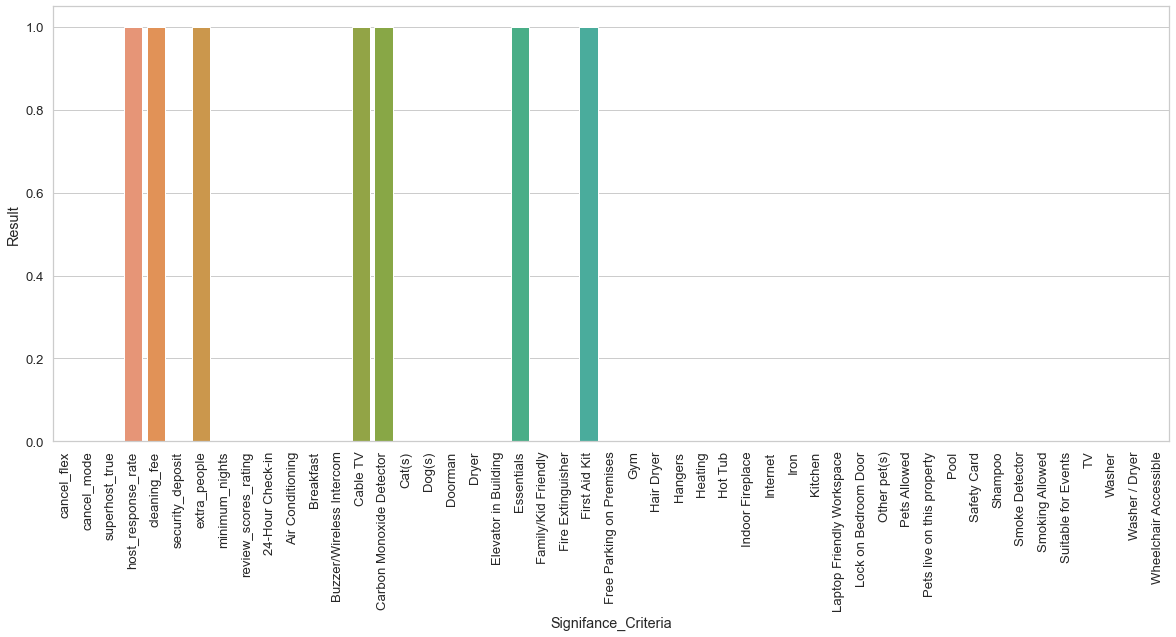

In [79]:
#bar plot visual of the p-values
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.figure(figsize=[20,8])
sns.barplot(data=P_values[1:],x='Signifance_Criteria',y='Result')
plt.xticks(rotation=90);

<b> From the above analysis, it can be inferred that there are around 7 factors which contribute/attract or have critical significance in drawing cutomers into booking the stays for the future. Host Response on the queries has played one of the major part. On the financial side, Cleaning fee and extra people cost has played a role on which people obviously would prefer the stays which has the least extra charges. On the Amenities front, though there a number of options a particular stay offer but Cable TV, Carbon Monoxide detector,Essentials and First Aid kit will be the the most significant on leading the customers to bookings which gives an idea that users prefer Safety with basic needs as their most preferred Amenity </b>

<b> Limitations </b>
<ol>
<li> The above analysis is made from a handful of Features which I thought would personally affect the bookings, there could be more or less factors than this </li>
<li> Though I have put in my best effort in determing the significance using an OLS method to fit in this data,there could be better method in determining the same</li>    